In [24]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [25]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [26]:
NUM_CLASSES = 22

# Dataset reading

In [27]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42 * 2) + 1)))

In [28]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [31]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 84)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                1700      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 22)                242       
                                                                 
Total params: 2,152
Trainable params: 2,152
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [33]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [34]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/20 [>.............................] - ETA: 15s - loss: 3.1066 - accuracy: 0.0781
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 1s 15ms/step - loss: 3.1006 - accuracy: 0.0633 - val_loss: 3.0541 - val_accuracy: 0.0786
Epoch 2/1000
13/20 [==================>...........] - ETA: 0s - loss: 3.0594 - accuracy: 0.0781
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 10ms/step - loss: 3.0597 - accuracy: 0.0746 - val_loss: 3.0201 - val_accuracy: 0.0895
Epoch 3/1000
 1/20 [>.............................] - ETA: 0s - loss: 3.0260 - accuracy: 0.0938
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 7ms/step - loss: 3.0172 - accuracy: 0.0810 - val_loss: 2.9765 - val_accuracy: 0.0931
Epoch 4/1000
 1/20 [>.............................] - ETA: 0s - loss: 3.0010 - accuracy: 0.015

17/20 [========================>.....] - ETA: 0s - loss: 2.2521 - accuracy: 0.1962
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 15ms/step - loss: 2.2507 - accuracy: 0.1992 - val_loss: 2.0980 - val_accuracy: 0.3966
Epoch 29/1000
15/20 [=====================>........] - ETA: 0s - loss: 2.2407 - accuracy: 0.1995
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 12ms/step - loss: 2.2431 - accuracy: 0.1984 - val_loss: 2.0885 - val_accuracy: 0.4462
Epoch 30/1000
 1/20 [>.............................] - ETA: 0s - loss: 2.3211 - accuracy: 0.1094
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 10ms/step - loss: 2.2346 - accuracy: 0.1956 - val_loss: 2.0704 - val_accuracy: 0.4051
Epoch 31/1000
16/20 [=======================>......] - ETA: 0s - loss: 2.2303 - accuracy: 0.2021
Epoch

 1/20 [>.............................] - ETA: 0s - loss: 1.9165 - accuracy: 0.3125
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.9595 - accuracy: 0.2847 - val_loss: 1.6199 - val_accuracy: 0.6155
Epoch 56/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.8439 - accuracy: 0.3047
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 7ms/step - loss: 1.9371 - accuracy: 0.2899 - val_loss: 1.6082 - val_accuracy: 0.6542
Epoch 57/1000
20/20 [==============================] - ETA: 0s - loss: 1.9481 - accuracy: 0.2911
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 7ms/step - loss: 1.9481 - accuracy: 0.2911 - val_loss: 1.6061 - val_accuracy: 0.6336
Epoch 58/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.8361 - accuracy: 0.2969
Epoch 58

 1/20 [>.............................] - ETA: 0s - loss: 1.7928 - accuracy: 0.2734
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.8457 - accuracy: 0.3214 - val_loss: 1.4223 - val_accuracy: 0.6844
Epoch 83/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.7017 - accuracy: 0.4141
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.8166 - accuracy: 0.3302 - val_loss: 1.4068 - val_accuracy: 0.6929
Epoch 84/1000
20/20 [==============================] - ETA: 0s - loss: 1.8372 - accuracy: 0.3190
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 7ms/step - loss: 1.8372 - accuracy: 0.3190 - val_loss: 1.4217 - val_accuracy: 0.6747
Epoch 85/1000
17/20 [========================>.....] - ETA: 0s - loss: 1.8172 - accuracy: 0.3286
Epoch 85

 1/20 [>.............................] - ETA: 0s - loss: 1.7927 - accuracy: 0.3125
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.7961 - accuracy: 0.3448 - val_loss: 1.3042 - val_accuracy: 0.7412
Epoch 110/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6831 - accuracy: 0.4062
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.7498 - accuracy: 0.3690 - val_loss: 1.3119 - val_accuracy: 0.7207
Epoch 111/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.8448 - accuracy: 0.4141
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.7806 - accuracy: 0.3468 - val_loss: 1.2998 - val_accuracy: 0.7279
Epoch 112/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.7038 - accuracy: 0.4453
Ep

Epoch 136/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.8533 - accuracy: 0.3203
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.6982 - accuracy: 0.3972 - val_loss: 1.2345 - val_accuracy: 0.7533
Epoch 137/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.7041 - accuracy: 0.3828
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.7427 - accuracy: 0.3774 - val_loss: 1.2283 - val_accuracy: 0.7606
Epoch 138/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6737 - accuracy: 0.4062
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.7089 - accuracy: 0.3754 - val_loss: 1.2253 - val_accuracy: 0.7509
Epoch 139/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6842 - accu

Epoch 163/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6093 - accuracy: 0.4375
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.6527 - accuracy: 0.4085 - val_loss: 1.1655 - val_accuracy: 0.7823
Epoch 164/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.8119 - accuracy: 0.3359
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 6ms/step - loss: 1.6884 - accuracy: 0.3887 - val_loss: 1.1682 - val_accuracy: 0.7654
Epoch 165/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6461 - accuracy: 0.3828
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 6ms/step - loss: 1.6481 - accuracy: 0.4036 - val_loss: 1.1733 - val_accuracy: 0.7606
Epoch 166/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6640 - accu

Epoch 190/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6332 - accuracy: 0.3828
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 4ms/step - loss: 1.5967 - accuracy: 0.4294 - val_loss: 1.0992 - val_accuracy: 0.8210
Epoch 191/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6049 - accuracy: 0.4766
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.6438 - accuracy: 0.4044 - val_loss: 1.1201 - val_accuracy: 0.8017
Epoch 192/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6240 - accuracy: 0.3984
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.6345 - accuracy: 0.4177 - val_loss: 1.1200 - val_accuracy: 0.8368
Epoch 193/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.5344 - accu

Epoch 217/1000
16/20 [=======================>......] - ETA: 0s - loss: 1.5881 - accuracy: 0.4243
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 8ms/step - loss: 1.5883 - accuracy: 0.4238 - val_loss: 1.0909 - val_accuracy: 0.8174
Epoch 218/1000
18/20 [==========================>...] - ETA: 0s - loss: 1.6114 - accuracy: 0.4288
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 8ms/step - loss: 1.6153 - accuracy: 0.4270 - val_loss: 1.0962 - val_accuracy: 0.8077
Epoch 219/1000
19/20 [===========================>..] - ETA: 0s - loss: 1.5817 - accuracy: 0.4297
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 7ms/step - loss: 1.5841 - accuracy: 0.4310 - val_loss: 1.0827 - val_accuracy: 0.8440
Epoch 220/1000
18/20 [==========================>...] - ETA: 0s - loss: 1.5822 - accu

Epoch 244/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.5481 - accuracy: 0.4609
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.5793 - accuracy: 0.4226 - val_loss: 1.0857 - val_accuracy: 0.8041
Epoch 245/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.5697 - accuracy: 0.4609
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 6ms/step - loss: 1.5623 - accuracy: 0.4419 - val_loss: 1.0674 - val_accuracy: 0.8271
Epoch 246/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6484 - accuracy: 0.3594
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.5807 - accuracy: 0.4331 - val_loss: 1.1013 - val_accuracy: 0.8138
Epoch 247/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.5528 - accu

Epoch 271/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.5343 - accuracy: 0.4766
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.5409 - accuracy: 0.4419 - val_loss: 1.0637 - val_accuracy: 0.8271
Epoch 272/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6288 - accuracy: 0.3750
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 6ms/step - loss: 1.5559 - accuracy: 0.4532 - val_loss: 1.0699 - val_accuracy: 0.8283
Epoch 273/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.7374 - accuracy: 0.4141
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
20/20 [==============================] - 0s 5ms/step - loss: 1.5430 - accuracy: 0.4427 - val_loss: 1.0533 - val_accuracy: 0.8428
Epoch 274/1000
 1/20 [>.............................] - ETA: 0s - loss: 1.6535 - accu

In [35]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 [==============================] - 0s 2ms/step - loss: 1.0522 - accuracy: 0.8150


In [36]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 59ms/step
[3.8826549e-01 3.0482528e-04 3.9916649e-02 2.4775441e-05 7.8822315e-02
 9.2215283e-05 2.7288569e-02 6.0385835e-05 8.6138241e-02 1.2783536e-04
 2.1124022e-02 1.7638401e-04 4.9904413e-03 2.1375474e-05 4.7487032e-02
 1.8434010e-04 1.5863580e-01 1.1208426e-03 5.3161677e-02 1.2821396e-04
 9.1313124e-02 6.1546400e-04]
0


# Confusion matrix

26/26 [==============================] - 0s 1ms/step


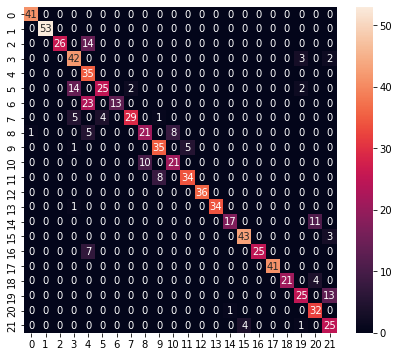

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      1.00      1.00        53
           2       1.00      0.65      0.79        40
           3       0.67      0.89      0.76        47
           4       0.42      1.00      0.59        35
           5       0.86      0.58      0.69        43
           6       1.00      0.36      0.53        36
           7       0.94      0.74      0.83        39
           8       0.68      0.60      0.64        35
           9       0.80      0.85      0.82        41
          10       0.72      0.68      0.70        31
          11       0.87      0.81      0.84        42
          12       1.00      1.00      1.00        36
          13       1.00      0.97      0.99        35
          14       0.94      0.61      0.74        28
          15       0.91      0.93      0.92        46
          16       1.00      0.78      0.88        32
     

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [39]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [40]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpls6xgkjm\assets


INFO:tensorflow:Assets written to: C:\Users\facut\AppData\Local\Temp\tmpls6xgkjm\assets


5720

# Inference test

In [41]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [42]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [43]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [44]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [45]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.89066458e-01 2.80971435e-04 3.88836116e-02 2.21084592e-05
 7.77723938e-02 8.41995061e-05 2.62872037e-02 5.55487022e-05
 8.26733634e-02 1.16712625e-04 2.01035254e-02 1.63440272e-04
 4.67277737e-03 1.88923404e-05 4.79710475e-02 1.64920813e-04
 1.63582116e-01 1.06929825e-03 5.35232499e-02 1.16145791e-04
 9.28115100e-02 5.60463290e-04]
0
